
<br>
Created on Aug. 12, 2020<br>
@author: Alireza Shamsoshoara<br>
@Project: Aerial image dataset for fire classification, segmentation, and scheduling using<br>
          Unmanned Aerial Vehicles (UAVs)<br>
          Paper: https://ieeexplore.ieee.org/abstract/document/9381488<br>
          Arxiv: https://arxiv.org/pdf/2012.14036.pdf<br>
          Dataset: https://ieee-dataport.org/open-access/flame-dataset-aerial-imagery-pile-burn-detection-using-drones-uavs<br>
          YouTube Video: https://www.youtube.com/watch?v=bHK6g37_KyA<br>
@Northern Arizona University<br>
This project is developed and tested with Python 3.6 using pycharm on Ubuntu 18.04 LTS machine<br>


###############################<br>
Main File<br>
###############################

############# import libraries<br>
General Modules

Customized Modules

In [23]:
from config import Mode
from config import Flags

In [24]:
from config import pathVid_fire
from config import pathFrame_all
from config import pathFrame_resize
from config import pathVid_LakeMary
from config import pathFrame_lakemary
from config import pathFrame_resize_lakemary

In [25]:
from config import pathFrame_test
from config import pathVid_test_Fire
from config import pathVid_test_NoFire
from config import pathFrame_resize_test

In [26]:
from utils import resize
from utils import get_fps
from utils import play_vid
from utils import vid_to_frame
from utils import rename_all_files

In [27]:
from training import train_keras
from classification import classify
from segmentation import segmentation_keras_load

from plotdata import plot_scheduling<br>
from scheduling import uav_scheduling

In [28]:
def main():
    fps = get_fps(path_vid)
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
    if Flags.get('playVideoFlag'):
        play_vid(path_vid)
    if Flags.get('SaveRawFrameFlag'):
        vid_to_frame(path_vid, mode=Mode)
    if Flags.get('ResizeFlag'):
        resize(path_load, path_save_resize, mode=Mode)

 --------- Training --------- 
Weight for class fire : 0.79
Weight for class No_fire : 1.37
Found 39375 files belonging to 2 classes.
Using 31500 files for training.
Found 39375 files belonging to 2 classes.
Using 7875 files for validation.
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/40
394/985 [===========>..................] - ETA: 11:09 - loss: 0.3772 - accuracy: 0.8266

KeyboardInterrupt: 

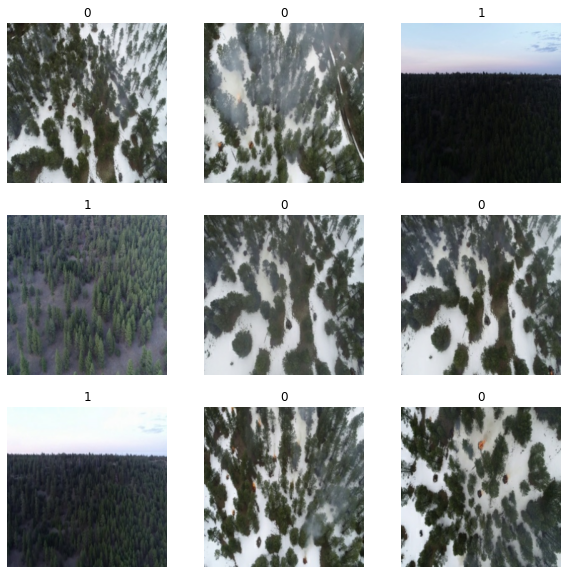

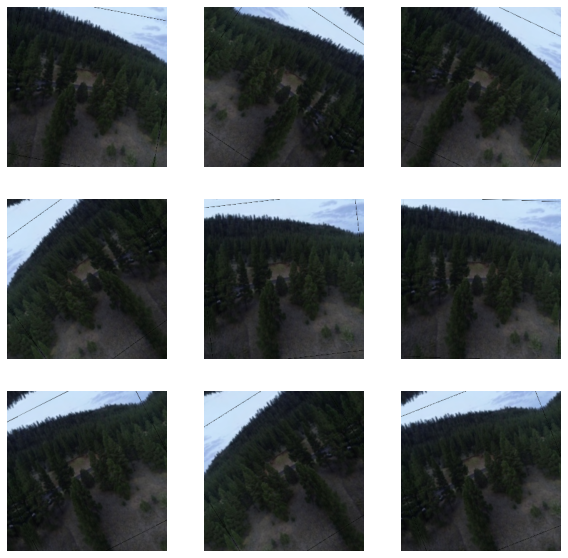

In [29]:
if __name__ == "__main__":
    if Mode == 'Fire':
        path_vid = pathVid_fire
        path_load = pathFrame_all
        path_save_resize = pathFrame_resize
        main()
    elif Mode == 'Lake_Mary':
        path_vid = pathVid_LakeMary
        path_load = pathFrame_lakemary
        path_save_resize = pathFrame_resize_lakemary
        main()
    elif Mode == 'Test_Frame':
        # path_vid = pathVid_test_Fire
        path_vid = pathVid_test_NoFire
        path_load = pathFrame_test
        path_save_resize = pathFrame_resize_test
        main()
    elif Mode == 'Training':
        train_keras()
    elif Mode == 'Classification':
        classify()
    elif Mode == 'Rename':
        rename_all_files(path="Image")
        rename_all_files(path="Mask")
    elif Mode == 'Segmentation':
        segmentation_keras_load()
    # elif Mode == 'Scheduling':
    #     uav_scheduling()
    #     plot_scheduling()
    else:
        print("Mode is not correct")